# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Syifa Fatmawati
- **Email:** syifafatmawati@upi.edu
- **ID Dicoding:** syifafatmaa

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dan *revenue* Olist store dalam 6 bulan terakhir?
- Produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana pengaruh lama waktu pengiriman terhadap kepuasan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [6]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/syifafatma/Dataset-Proyek-Analisis-Data/refs/heads/main/olist_customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- tabel ini menyimpan berbagai informasi terkait customer yang terdiri dari `customer_id`, `customer_unique_id`, `customer_zip_code_prefix`, `customer_city`, dan `customer_state`

In [7]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/syifafatma/Dataset-Proyek-Analisis-Data/refs/heads/main/olist_orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
*    tabel ini menyimpan berbagai informasi terkait sebuah order yang terdiri dari `order_id`, `customer_id`, `order_status`, `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date`




In [8]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/syifafatma/Dataset-Proyek-Analisis-Data/refs/heads/main/olist_order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight:**
* tabel ini menyimpan berbagai informasi terkait items yang dibeli pada setiap order seperti `order_id`, `order_item_id`, `product_id`, `seller_id`, `shipping_limit_date`, `price`, dan `freight_value`

In [9]:
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/syifafatma/Dataset-Proyek-Analisis-Data/refs/heads/main/olist_order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
* tabel ini menyimpan berbagai informasi terkait pembayaran suatu order yang terdiri dari `order_id`, `payment_sequential`, `payment_type`, `payment_installments`, dan `payment_value`

In [10]:
order_reviews_df = pd.read_csv("https://raw.githubusercontent.com/syifafatma/Dataset-Proyek-Analisis-Data/refs/heads/main/olist_order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight:**
* tabel ini memiliki berbagai informasi terkait review pelanggan terhadap produk yang dibeli, seperti `review_id`, `order_id`, `review_score`, `review_comment_title`, `review_comment_message`, `review_creation_date`, dan `review_answer_timestamp`

In [11]:
products_df = pd.read_csv("https://raw.githubusercontent.com/syifafatma/Dataset-Proyek-Analisis-Data/refs/heads/main/olist_products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
* tabel ini berisi berbagai informasi terkait sebuah produk seperti `product_id`, `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm`

In [12]:
product_category_name_translation_df = pd.read_csv("https://raw.githubusercontent.com/syifafatma/Dataset-Proyek-Analisis-Data/refs/heads/main/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
* tabel ini memiliki informasi terkait nama produk yang telah diterjemahkan ke dalam bahasa Inggris. Terdapat dua kolom pada tabel ini, yaitu `product_category_name` dan `product_name_english`

In [13]:
geolocation_df = pd.read_csv("/content/drive/MyDrive/Dataset Proyek Analisis Data Dicoding/olist_geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
* tabel ini memiliki berbagai informasi terkait lokasi geografis suatu kota/negara bagian yang terdiri dari `geolocation_zip_code_prefix`, `geolocation_lat`, `geolocation_lng`, `geolocation_city`, dan `geolocation_state`

### Assessing Data

**Menilai data `cutomers_df`**

In [14]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Insight:**
- tidak ada masalah dengan tipe data dan jumlah data pada tabel `customers_df`

In [15]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


**Insight:**
* tidak terdapat missing value pada tabel `customers_df`

In [16]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
* tidak terdapat duplikasi data pada tabel `customers_df`

In [17]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Menilai data `orders_df`**

In [18]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
* jumlah data pada kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date` kurang dari 99441. Hal ini menandakan terdapat missing value pada kolom-kolom tersebut.
* terdapat kesalahan tipe data pada kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`,  `order_delivered_customer_date`, `order_estimated_customer_date`, dan `order_estimated_delivery_date`. Kolom-kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object


In [19]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


**Insight:**
* terdapat missing value sebanyak 160 pada kolom `order_approved_at`, 1783 pada kolom `order_delivered_carrier_date`, dan 2965 pada kolom `order_delivered_customer_date`. Oleh karena itu, data `orders_df` ini perlu dilakukan pembersihan.

In [20]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
* tidak terdapat duplikasi data pada tabel `orders_df`
* tidak terdapat keanehan nilai pada `orders_df`

**Menilai data `order_items_df`**

In [21]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Insight:**
* tidak ada masalah dengan tipe data dan jumlah data pada `order_items_df`

In [22]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


**Insight:**
* tidak terdapat missing value pada `order_items_df`

In [23]:
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
* tidak terdapat duplikasi data pada `order_items_df`

**Menilai data `order_payments_df`**

In [24]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**Insight:**
* tidak ada masalah pada tipe data dan jumlah data pada `order_payments_df`

In [25]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


**Insight:**
* tidak terdapat missing value pada `order_payments_df`

In [26]:
print("Jumlah duplikasi: ",order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
* tidak terdapat duplikasi data pada `order_payments_df`
* tidak terdapat keanehan nilai pada `order_payments_df`

**Menilai data `order_reviews_df`**

In [27]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


**Insight:**
* jumlah data pada kolom `review_comment_title` dan `review_comment_message` kurang dari 99224. Hal ini menandakan adanya missing value pada kedua kolom tersebut.
* terdapat kesalahan tipe data pada kolom `review_creation_date` dan `review_answer_timestamp`. Kolom-kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object

In [28]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


**Insight:**
* terdapat missing value pada kolom `review_comment_title` dan `review_comment_message`. Karena jumlah missing value yang sangat besar dan kolom-kolom tersebut tidak akan digunakan pada proses analisis data, maka tidak akan dilakukan pembersihan data pada kolom-kolom tersebut.

In [29]:
print("Jumlah duplikasi: ",order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
* tidak terdapat duplikasi data pada `order_reviews_df`
* tidak terdapat keanehan nilai pada `order_reviews_df`

**Menilai data pada `products_df`**

In [30]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insight:**
* jumlah data pada kolom-kolom selain `product_id` kurang dari 32951. Hal ini menandakan adanya missing value pada kolom-kolom tersebut

In [31]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


**Insight:**
* terdapat missing value sebanyak 610 pada kolom `product_category_name`, `product_name_lenght`, `product_description_lenght`, dan `product_photos_qty`
* terdapat missing value sebanyak 2 pada kolom `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm`

In [32]:
print("Jumlah duplikasi: ",products_df.duplicated().sum())
products_df.describe(include="all")

Jumlah duplikasi:  0


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


**Insight:**
* tidak ada duplikasi data pada `products_df`
* terdapat kejanggalan pada nilai minimum `product_weight_g`. Hal ini memungkinkan adanya inaccurate value pada kolom tersebut sehingga diperlukan untuk melakukan pembersihan data

**Menilai data `product_category_name_translation_df`**

In [33]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


**Insight:**
* tidak ada masalah pada tipe data dan jumlah data pada `product_category_name_translation_df`

In [34]:
product_category_name_translation_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


**Insight:**
* tidak terdapat missing value pada `product_category_name_translation_df`

In [35]:
print("Jumlah duplikasi: ",product_category_name_translation_df.duplicated().sum())
product_category_name_translation_df.describe(include="all")

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
* tidak ada duplikasi data pada `product_category_name_translation_df`
* tidak ada keanehan nilai pada `product_category_name_translation_df`

**Menilai data `geolocation_df`**

In [36]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


**Insight:**
* tidak ada masalah pada tipe data dan jumlah data pada `geolocation_df`

In [37]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


**Insight:**
* tidak ada missing value pada `geolocation_df`

In [38]:
print("Jumlah duplikasi: ",geolocation_df.duplicated().sum())
geolocation_df.describe(include="all")

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


**Insight:**
* terdapat duplikasi data sebanyak 261831
* tidak terdapat keanehan nilai pada `geolocation_df`

### Cleaning Data

**Membersihkan data `orders_df`**

In [39]:
orders_df[orders_df[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isna().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


**Insight:**
- missing value pada kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date` bergantung pada `order_status` seperti cancelled, processing, unavaible. Hal ini tentunya masuk akal, sebagai contoh apabila suatu order masih berstatus processing tentunya kolom `order_delivered_customer_date`akan kosong karena product belum sampai ke customer.
- Karena alasan pada poin pertama, maka tidak akan dilakukan pembersihan

In [40]:
datetime_columns_in_orders = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns_in_orders:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [41]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Insight:**
- tipe data pada kolom-kolom yang tadinya bertipe object (`order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date`) telah berhasil diubah ke datetime

**Membersihkan data `order_reviews_df`**

In [42]:
datetime_columns_in_order_reviews = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns_in_order_reviews:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [43]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


**Insight:**
- tipe data pada kolom-kolom yang tadinya bertipe object (`review_creation_date` dan `review_answer_timestamp`) telah berhasil diubah ke datetime

Membersihkan data products_df

In [44]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


**Insight:**
- karena baris data yang memiliki missing value jumlahnya banyak dan masih mempunyai informasi penting berupa `product_id` (dan yang lainnya), maka akan dilakukan metode imputasi data pada `product_category_name`
- data yang tidak diketahui namanya akan diberi label "unknown" karena saya tidak memiliki background knowledge

In [45]:
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Insight:**
- karena baris data yang memiliki missing value masih mempunyai informasi penting berupa `product_id` (dan yang lainnya), maka akan dilakukan metode imputasi data

In [46]:
products_df.product_category_name.fillna("unknown", inplace=True)

<ipython-input-46-e62ca2ea9b16>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_category_name.fillna("unknown", inplace=True)


In [47]:
products_df.product_weight_g.fillna(value=products_df.product_weight_g.mean(), inplace=True)
products_df.product_length_cm.fillna(value=products_df.product_length_cm.mean(), inplace=True)
products_df.product_height_cm.fillna(value=products_df.product_height_cm.mean(), inplace=True)
products_df.product_width_cm.fillna(value=products_df.product_width_cm.mean(), inplace=True)

<ipython-input-47-fd274f762929>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_weight_g.fillna(value=products_df.product_weight_g.mean(), inplace=True)
<ipython-input-47-fd274f762929>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [48]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insight:**
- sudah tidak ada missing value pada kolom `product_category_name`, `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm`

**Membersihkan data `geolocation_df`**

In [49]:
geolocation_df.drop_duplicates(inplace=True)

In [50]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory Data Analysis (EDA)

### Explore data `customers_df`

In [51]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [52]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


**Insight:**
- Pelanggan Olli store didominasi oleh orang yang berasal dari kota Sao Paulo, Rio de Jenairo, dan Belo Horizonte.
- Negara bagian (state) yang memiliki pelanggan terbanyak adalah SP, lalu diikuti oleh RJ dan MG

### Explore data `orders_df`

In [53]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [54]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,96476.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,12.517548
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,16.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,210.000000


In [55]:
 orders_df.value_counts("order_status")

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


**Insight:**
- rata-rata waktu pengiriman sebesar 12 hari dengan nilai maksimum sebesar 210 hari dan nilai minimum sebesar 1 hari.
- terdapat 96478 produk yang sudah terkirim dan 1107 masih berada di perjalanan.

### Explore data `order_payments`

In [56]:
order_payments_df.value_counts("payment_type")

,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


**Insight:**
- pelanggan paling banyak menggunakan credit card untuk melakukan pembayaran
- sebanyak 5775 order menggunakan voucher dalam pembayarannya

### Explore data `product_category_name_translation`

In [57]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


**Insight:**
- terdapat 71 nama product yang telah diterjemahkan ke dalam bahasa Inggris

### Explore data `customers_df` dan `orders_df`

In [58]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["customer_status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_status
48226,be246cd60ac804fef4aac069a77b3df6,7732ee57ffb624c39ed389678618f5c1,13106,campinas,SP,Active
1849,b4e1d5fdf13905222b7a571b9edad9ef,9eb5dbe2b5f217e8a10c5b7e14b90346,8290,sao paulo,SP,Active
35746,6dfa75688bd7027b450552eb0353741c,c158265daf9d45a643c9b9810f7f511a,88302,itajai,SC,Active
19479,969f82ea6c0e993d213d162a61e53fa0,a68d6423acbccbd710490c25327f1fdc,6020,osasco,SP,Active
31807,9ab9e1f4d8422cd9331a8fbb2e3eca01,4186b96df8197e7b4982a751c1dde3b6,4416,sao paulo,SP,Active


In [59]:
customers_df.groupby(by="customer_status").customer_id.count()

,customer_id
customer_status,
Active,99441


In [60]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [61]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [62]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


**Insight:**
- seluruh pelanggan pernah melakukan order di Olist store (dilihat dari status customer yang "Active")
- Sao Paulo merupakan kota dengan jumlah order terbanyak
- SP merupakan negara bagian dengan jumlah order terbanyak, sedangkan RR memiliki jumlah order terkecil

### Explore `products_df` dan `order_items_df`

In [63]:
product_order_items_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
product_order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [64]:
product_order_items_df.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,product_category_name,order_id
0,cama_mesa_banho,9417
1,beleza_saude,8836
2,esporte_lazer,7720
3,informatica_acessorios,6689
4,moveis_decoracao,6449
5,utilidades_domesticas,5884
6,relogios_presentes,5624
7,telefonia,4199
8,automotivo,3897
9,brinquedos,3886


**Insight:**
- produk yang paling banyak terjual adalah cama mesa banho dengan total order sebesar 8836

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dan revenue Olist store dalam 6 bulan terakhir?

In [65]:
all_orders_df = pd.merge(
    left=product_order_items_df,
    right=orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_orders_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,9.0,14.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,30.0,40.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,13.0,33.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,8.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,10.0,15.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,40.0,30.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0


In [66]:
monthly_orders_df = all_orders_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df.head()

<ipython-input-66-e4c166dd40c1>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_orders_df.resample(rule='M', on='order_approved_at').agg({


,order_approved_at,order_count,revenue
0,2016-09,1,134.97
1,2016-10,310,49640.05
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,752,114860.71


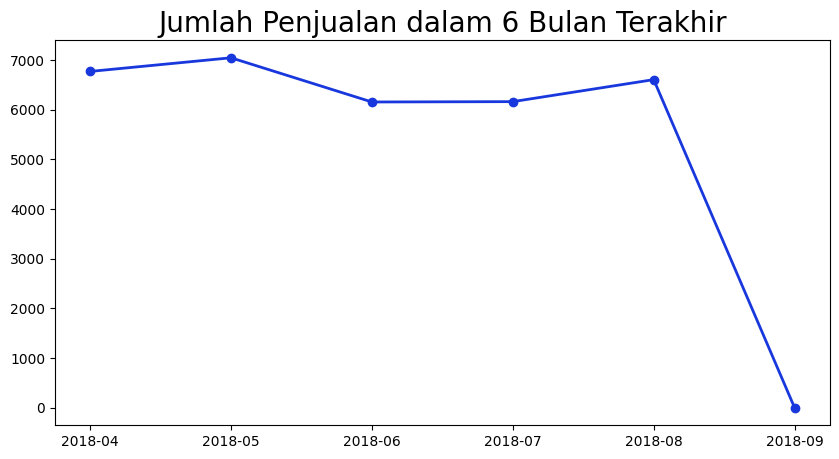

In [105]:
last_6_months_df = monthly_orders_df.tail(6)

plt.figure(figsize=(10, 5))
plt.plot(last_6_months_df["order_approved_at"], last_6_months_df["order_count"], marker='o', linewidth=2, color="#1838de")
plt.title("Jumlah Penjualan dalam 6 Bulan Terakhir", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

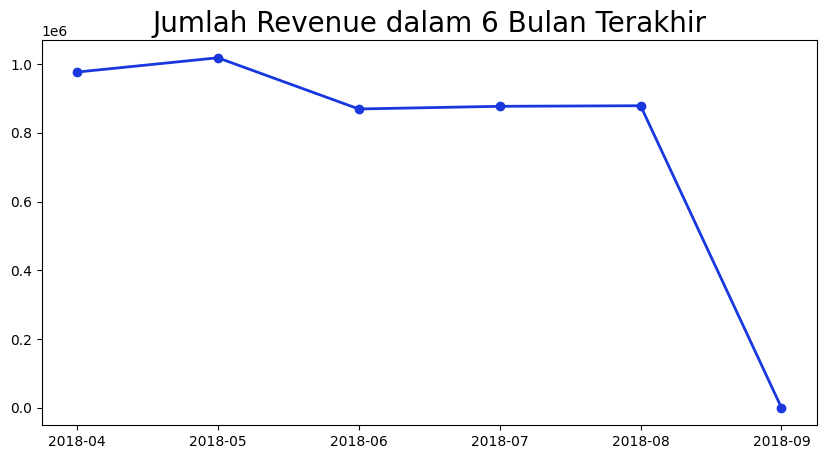

In [106]:
plt.figure(figsize=(10, 5))
plt.plot(last_6_months_df["order_approved_at"], last_6_months_df["revenue"], marker='o', linewidth=2, color="#1838de")
plt.title("Jumlah Revenue dalam 6 Bulan Terakhir", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- terdapat penurunan penjualan yang signifikan pada bulan September 2018
- penurunan pada penjualan juga memengaruhi revenue yang didapat

### Pertanyaan 2: Produk apa yang paling banyak dan paling sedikit terjual?

In [69]:
all_orders_in_english_df = pd.merge(
    left=all_orders_df,
    right=product_category_name_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
all_orders_in_english_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,14.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,40.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,33.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,8.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,15.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,30.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0,garden_tools


In [71]:
sum_order_items_df = all_orders_in_english_df.groupby("product_category_name_english").order_id.count().sort_values(ascending=False).reset_index()
sum_order_items_df.head(10)

,product_category_name_english,order_id
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
5,housewares,6964
6,watches_gifts,5991
7,telephony,4545
8,garden_tools,4347
9,auto,4235


<ipython-input-107-93e8b32b6129>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn

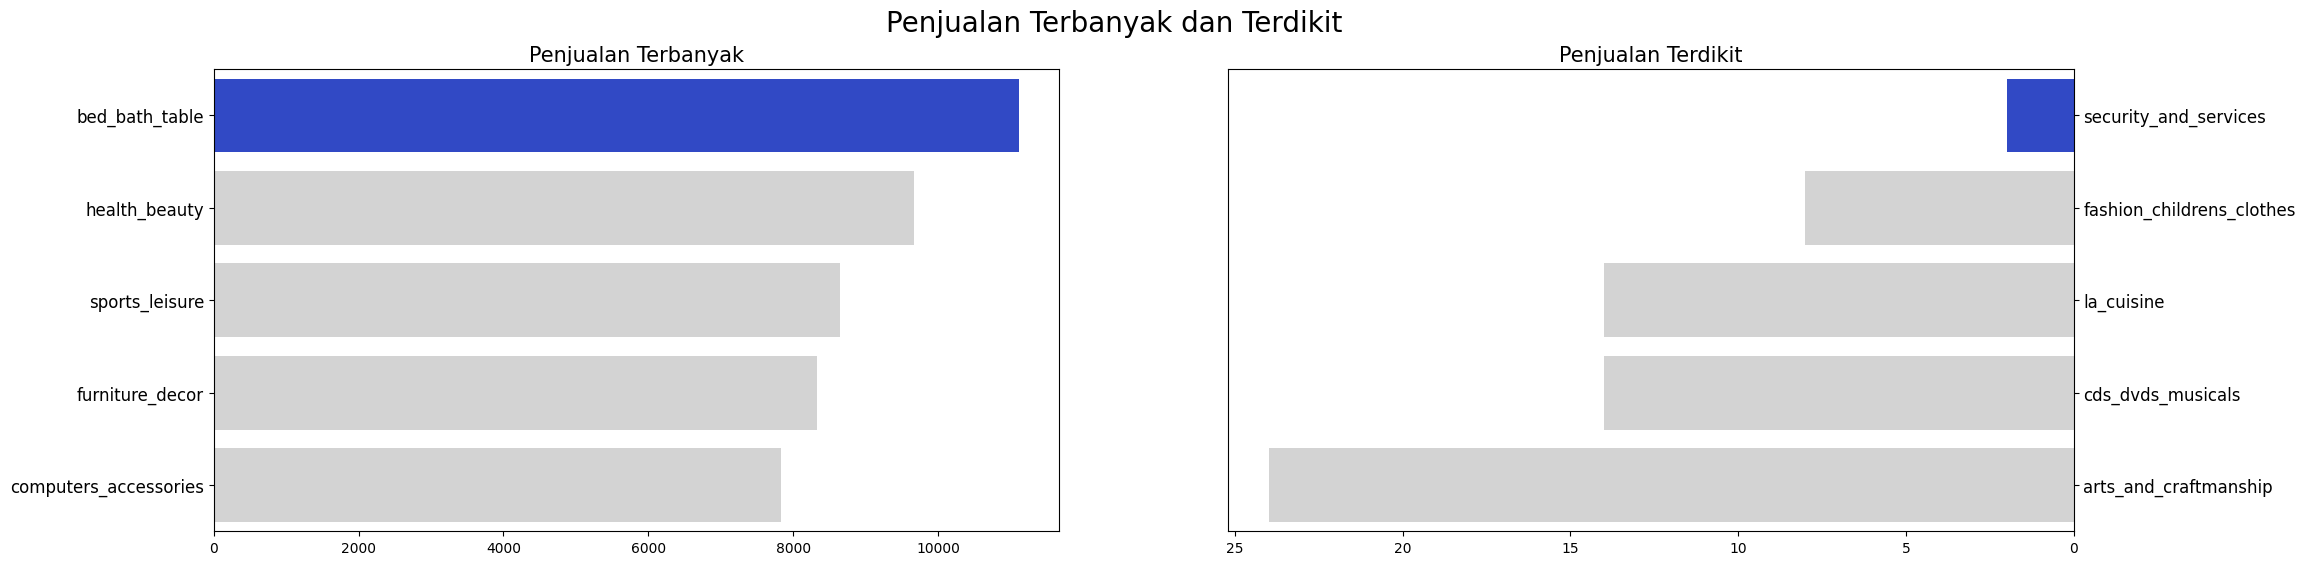

In [107]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#1838de", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_id", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Penjualan Terbanyak", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_id", y="product_category_name_english", data=sum_order_items_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Penjualan Terdikit", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Penjualan Terbanyak dan Terdikit", fontsize=20)
plt.show()

**Insight:**
- bed bath table adalah produk yang paling laris
- security and services adalah produk yang paling sedikit terjual

### Pertanyaan 3: Bagaimana pengaruh lama waktu pengiriman terhadap kepuasan pelanggan?

In [99]:
all_reviews_df = pd.merge(
    left=all_orders_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_reviews_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,8.0,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59


<ipython-input-119-93d1d77de150>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=all_reviews_df['review_score'], y=all_reviews_df['delivery_time'], palette="Blues")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass 

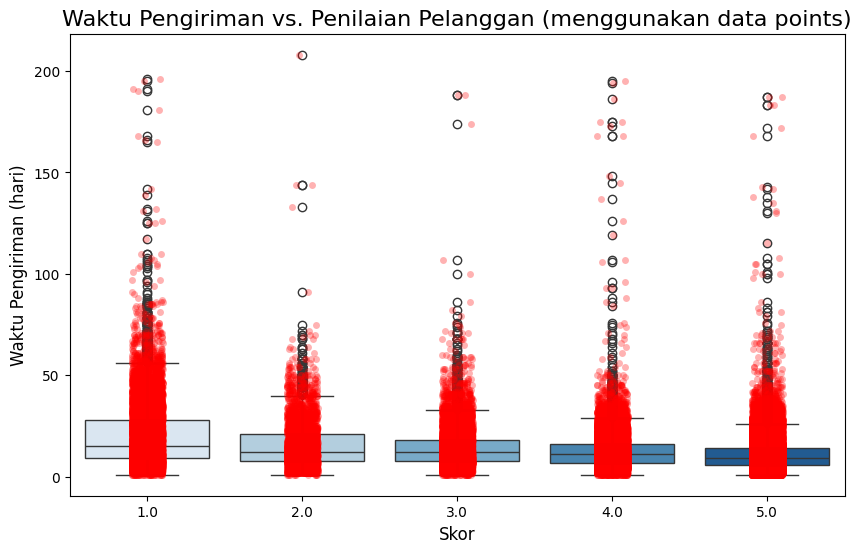

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=all_reviews_df['review_score'], y=all_reviews_df['delivery_time'], palette="Blues")
sns.stripplot(x=all_reviews_df['review_score'], y=all_reviews_df['delivery_time'], color='red', alpha=0.3, jitter=True)

plt.title("Waktu Pengiriman vs. Penilaian Pelanggan (menggunakan data points)", fontsize=16)
plt.xlabel("Skor", fontsize=12)
plt.ylabel("Waktu Pengiriman (hari)", fontsize=12)

plt.show()

**Insight:**
- **Skor 1**
  - mediannya relatif tinggi dan lebih bervariasi
  - menandakan semakin lama pengiriman semakin kecil skornya
- **Skor 2 dan 3**
  - persebaran datanya luas tapi tidak seekstrim skor 1
  - variasi waktu pengiriman lebih kecil dibanding skor 1
- **Skor 4 dan 5**
  - lama waktu pengiriman terkonsentrasi pada rentang nilai yang lebih rendah, menandakan bahwa pelanggan yang memberikan skor tinggi pada umumnya memiliki waktu pengiriman lebih rendah
  - terdapat beberapa outlier dengan nilai ekstrim


## Analisis Lanjutan (Opsional)

- Bagaimana demografi pelanggan Olist store?
- Kapan terakhir kali pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?
- Wilayah mana yang mengalami keterlambatan pengiriman paling lama?

<ipython-input-120-78b75b9d9f3d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-120-78b75b9d9f3d>:8: UserWarning: 
The palette list has fewer values (26) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = group

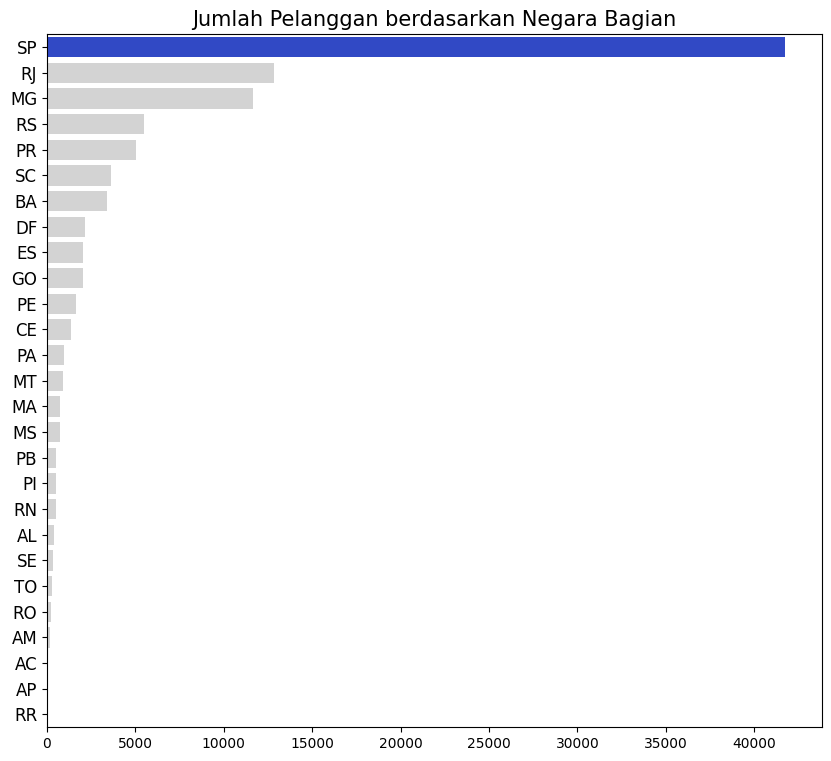

In [120]:
bystate_df = customers_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 9))
colors_ = ["#1838de", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Jumlah Pelanggan berdasarkan Negara Bagian", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
- pelanggan Olist store paling banyak berasal dari negara bagian SP.

In [87]:
rfm_df = all_orders_in_english_df.groupby(by="customer_id", as_index=False).agg({
    "order_delivered_customer_date": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir customer melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_delivered_customer_date"].dropna().dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days if pd.notnull(x) else None)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,323.0
1,000161a058600d5901f007fab4c27140,1,54.90,449.0
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,590.0
3,0002414f95344307404f0ace7a26f1d5,1,149.90,399.0
4,000379cdec625522490c315e70c7a9fb,1,93.00,187.0


<ipython-input-121-dc0f513337e4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packa

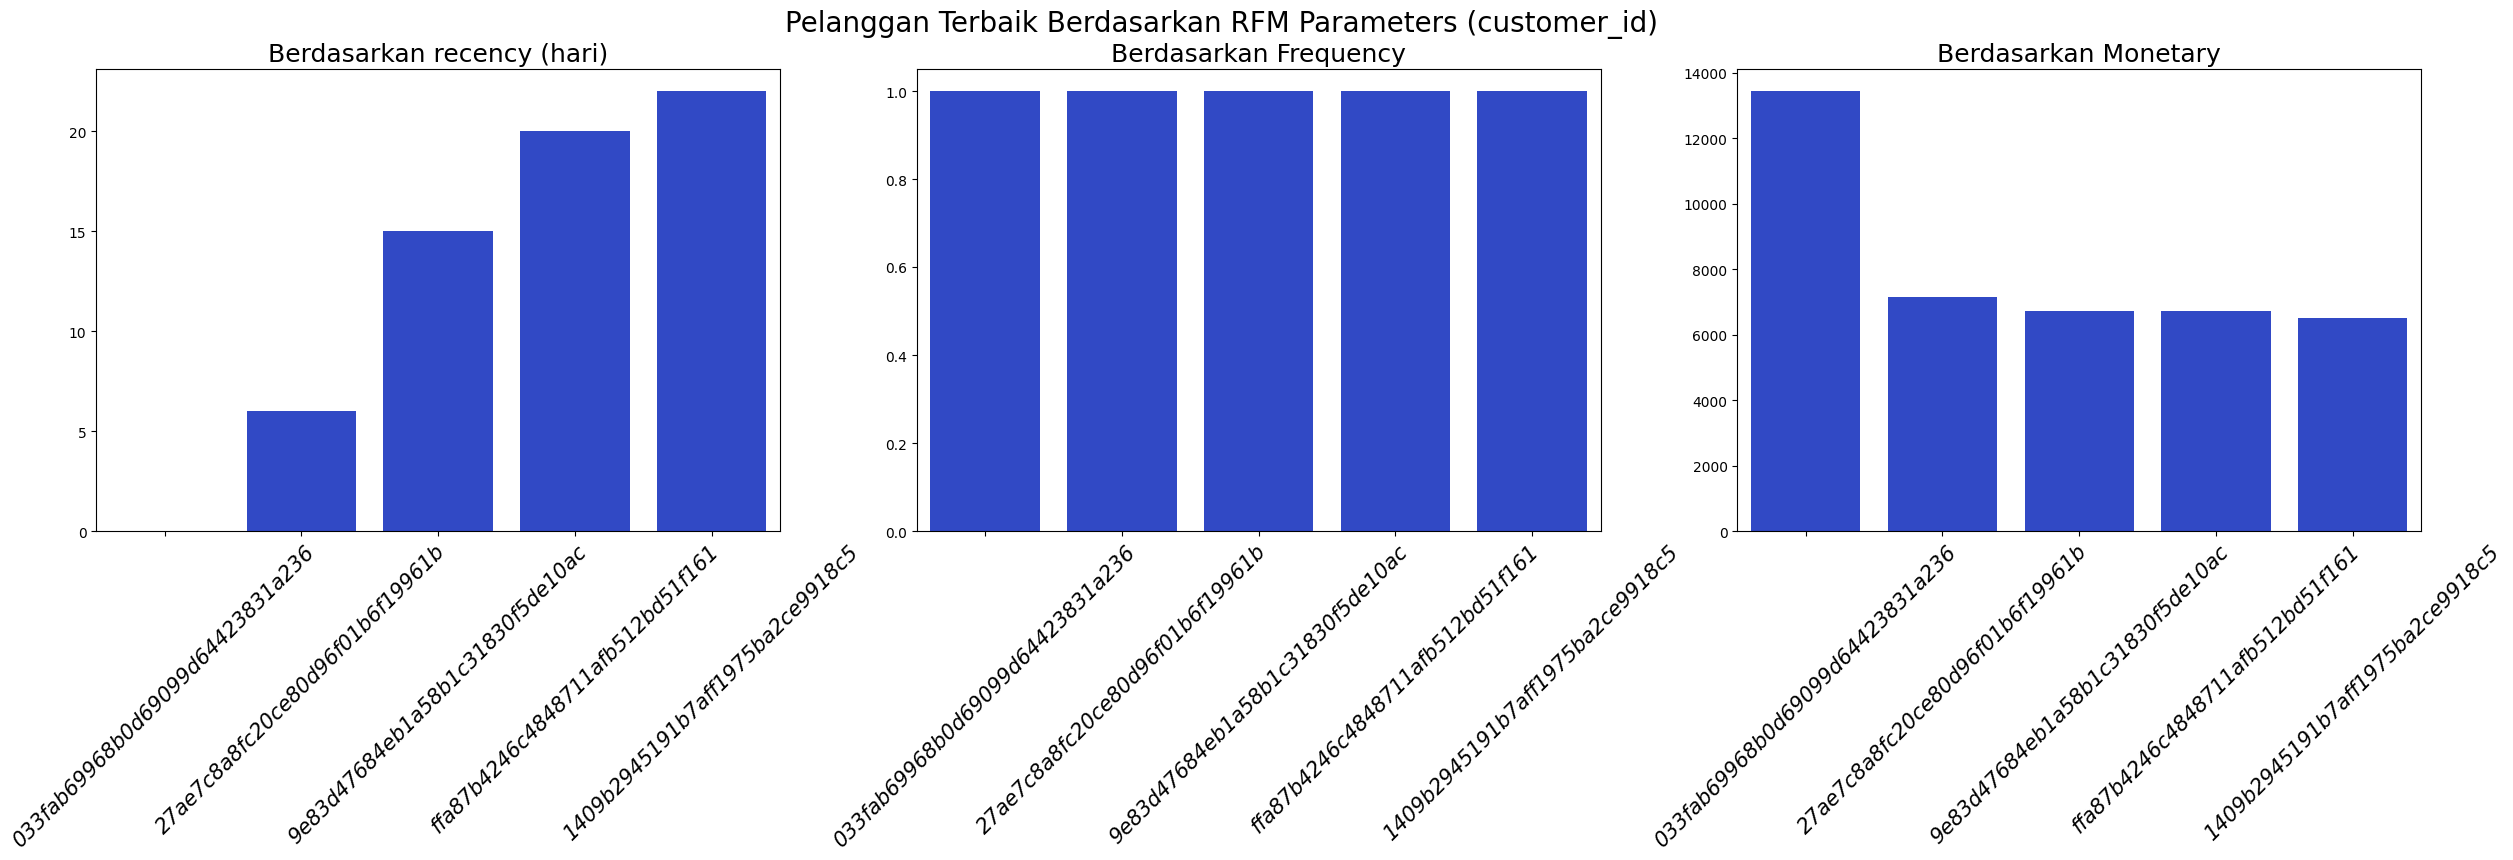

In [121]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#1838de", "#1838de", "#1838de", "#1838de", "#1838de"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan recency (hari)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, fontstyle='italic')

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45, fontstyle='italic')

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Berdasarkan Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=45, fontstyle='italic')

plt.suptitle("Pelanggan Terbaik Berdasarkan RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight:**
- Berdasarkan hasil RFM Analysis, pelanggan terbaik adalah pelanggan dengan tinggi bar tertinggi pada tiap grafik di atas

## Conclusion

- Penurunan penjualan yang drastis pada bulan September 2018 berdampak pada revenue yang didapatkan Olist store. Terdapat berbagai faktor yang dapat memengaruhi penurunan penjualan seperti fluktuasi musiman, masalah operasional, atau faktor eksternal. Perlu penyelidikan lebih lanjut untuk menentukan faktor penyebabnya agar penurunan penjualan secara drastis ini dapat dicegah.
- Bed Bath Table adalah produk terlaris di Olist store, menandakan bahwa produk ini memiliki demand yang tinggi dan banyak disukai pelanggan. Sedangkan Security and Services memiliki jumlah penjualan terendah. Hal tersebut bisa disebabkan oleh harga atau relevansi pelanggan. Sangat disarankan bagi Olist store untuk mengoptimalkan stok dari produk Bed Bath Table sambil menyusun strategi pemasaran Security and Services agar performanya dapat meningkat.
- Semakin lama waktu pengiriman, maka semakin rendah tingkat kepuasan pelanggan (begitu juga sebaliknya). Hal ini menandakan pelanggan lebih menyukai pengiriman yang cepat.